In [794]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, explained_variance_score
from sklearn.model_selection import cross_val_score
from math import sqrt
import warnings
warnings.filterwarnings("ignore")

In [795]:
# Importing dataset
data = pd.read_csv("AB_NYC_2019.csv")

# DATA PREPROCESSING

In [796]:
print("Shape of the dataset:", data.shape)
data.head()

Shape of the dataset: (48895, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [797]:
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [798]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [799]:
data1 = data
data.isna().sum().to_frame().reset_index()

,index,0
0,id,0
1,name,16
2,host_id,0
3,host_name,21
4,neighbourhood_group,0
5,neighbourhood,0
6,latitude,0
7,longitude,0
8,room_type,0
9,price,0


In [800]:
data["last_review"].fillna("Unknown", inplace=True)
data["name"].fillna("None", inplace=True)
data["host_name"].fillna("Unknown", inplace=True)
data["reviews_per_month"].fillna(data["reviews_per_month"].mode()[0], inplace=True)

In [801]:
data.isna().sum().to_frame().reset_index()

,index,0
0,id,0
1,name,0
2,host_id,0
3,host_name,0
4,neighbourhood_group,0
5,neighbourhood,0
6,latitude,0
7,longitude,0
8,room_type,0
9,price,0


In [802]:
print("Rows with 0 in price column: {}".format(len(data[data["price"] == 0])))
data = data.loc[~(data["price"] == 0)] # Dropping them
data.head()

Rows with 0 in price column: 11


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,Unknown,0.02,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [803]:
print("The number of duplicated rows: ",data.duplicated().sum(),"\n")
for i in data.columns:
    if len(data[i].unique()) > 15 :
        print("{} no. of unique: {}".format(i,len(data[i].unique())))
    else:
        print("{} no. of unique {} + unique values: {}".format(i,len(data[i].unique()), data[i].unique()))

The number of duplicated rows:  0 

id no. of unique: 48884
name no. of unique: 47895
host_id no. of unique: 37455
host_name no. of unique: 11451
neighbourhood_group no. of unique 5 + unique values: ['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']
neighbourhood no. of unique: 221
latitude no. of unique: 19046
longitude no. of unique: 14715
room_type no. of unique 3 + unique values: ['Private room' 'Entire home/apt' 'Shared room']
price no. of unique: 673
minimum_nights no. of unique: 109
number_of_reviews no. of unique: 394
last_review no. of unique: 1765
reviews_per_month no. of unique: 937
calculated_host_listings_count no. of unique: 47
availability_365 no. of unique: 366


In [804]:
data = data.drop(columns=["id", ])

In [805]:
# for i in ["price"]:
#     q1 = data[i].quantile(0.25)
#     q3 = data[i].quantile(0.75)
#     iqr = q3 - q1
#     low_limit = q1 - (1.5*iqr)
#     up_limit = q3 + (1.5*iqr)
#     print("Upper outlier {}".format(i))
#     print(len(data[data[i] > up_limit]))
#     print("Lower outlier {}".format(i))
#     print(len(data[data[i] < low_limit]))
#     data = data[(data[i] > low_limit) & (data[i] < up_limit)]

# EXPLORATORY DATA ANALYSIS

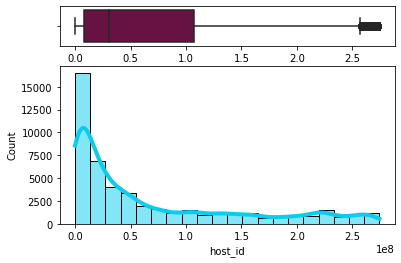

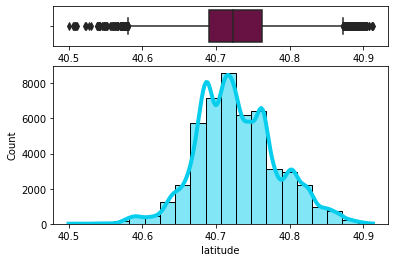

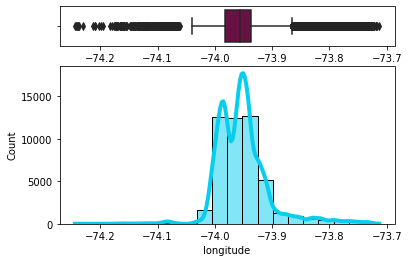

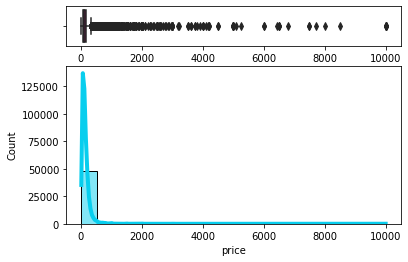

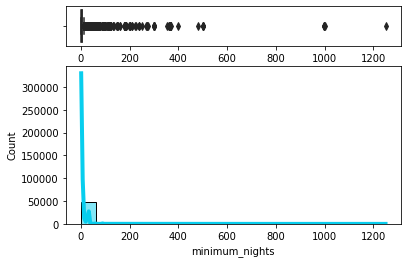

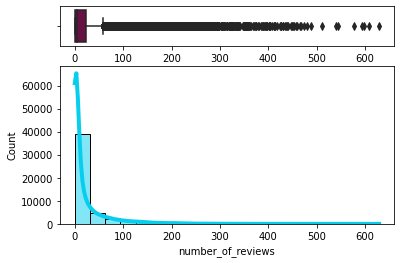

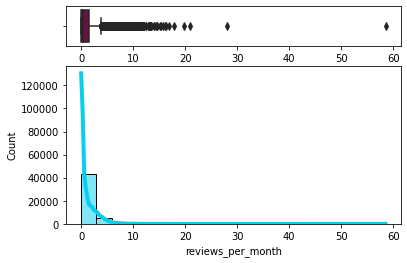

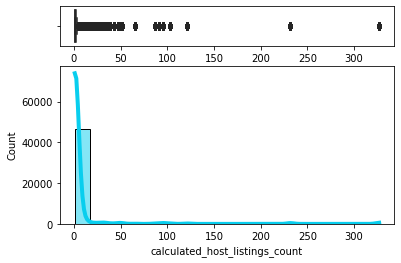

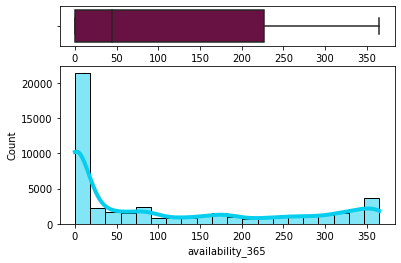

In [806]:
for i in data.select_dtypes(include="number").columns:
    fig,(ax1,ax2) = plt.subplots(2, gridspec_kw={"height_ratios": (.2, .8)})
    sns.boxplot(x=i,data=data, color="#760445", ax=ax1)
    sns.histplot(x=i,data=data, kde=True, color="#08CEEE", line_kws={"lw":4}, bins=20, ax=ax2)
    plt.show()

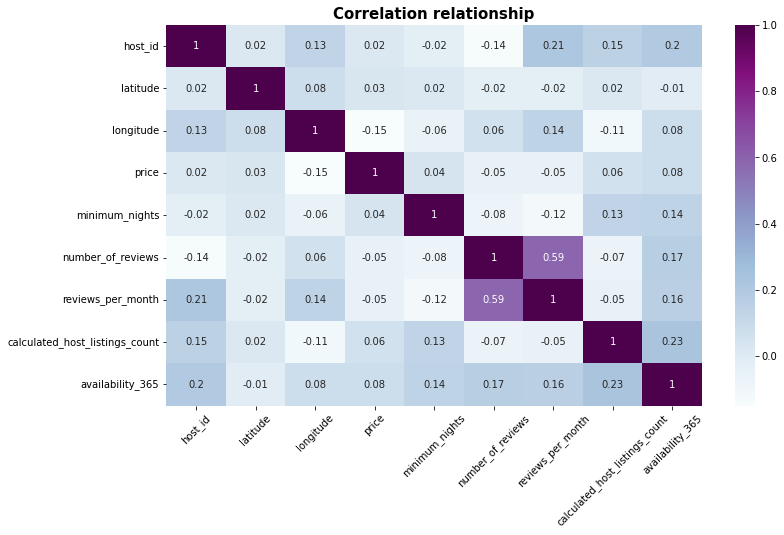

In [807]:
plt.figure(figsize=(12,7))
sns.heatmap(round(data.corr(),2), annot=True, cmap="BuPu")
plt.title("Correlation relationship", fontsize=15, fontweight="bold")
plt.xticks(rotation=45)
plt.show()

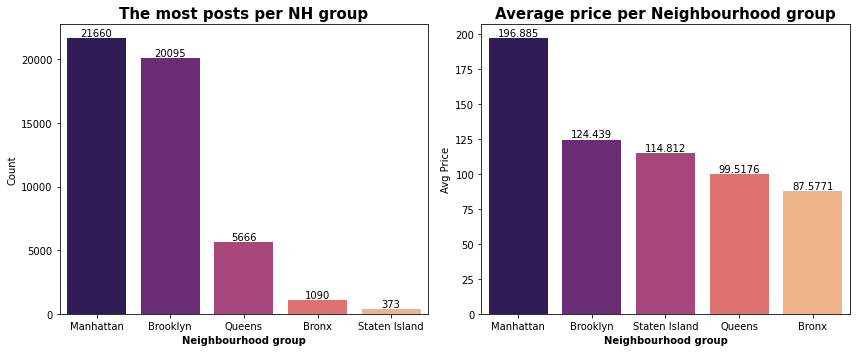

In [808]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
haz = sns.barplot(x="neighbourhood_group", y="price", data=data.groupby("neighbourhood_group").agg({"price":"mean"}).sort_values(by="price",ascending=False).reset_index(), ci=False, palette="magma", ax=ax2)
haz1 = sns.barplot(x="neighbourhood_group", y="price", data=data.groupby("neighbourhood_group").agg({"price":"count"}).sort_values(by="price",ascending=False).reset_index(), ci=False, palette="magma", ax=ax1)
haz.bar_label(haz.containers[0])
haz1.bar_label(haz1.containers[0])
ax2.set_title("Average price per Neighbourhood group", fontsize=15, weight="bold")
ax1.set_title("The most posts per NH group", fontsize=15, weight="bold")
ax1.set_ylabel("Count")
ax2.set_ylabel("Avg Price")
ax2.set_xlabel("Neighbourhood group", size=10, weight="bold")
ax1.set_xlabel("Neighbourhood group", size=10, weight="bold")
plt.tight_layout()
plt.show()

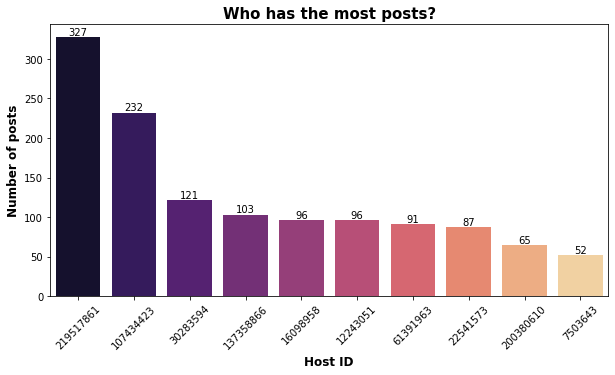

In [809]:
jup = data.groupby("host_id").agg({"name":"count"}).sort_values(by="name", ascending=False).head(10).reset_index()
plt.figure(figsize=(10,5))
haz = sns.barplot(data=jup, x="host_id",y="name", palette="magma", order=jup["host_id"])
haz.bar_label(haz.containers[0])
plt.title("Who has the most posts?", fontsize=15, fontweight="bold")
plt.xlabel("Host ID", fontsize=12, fontweight="bold")
plt.ylabel("Number of posts", fontsize=12, fontweight="bold")
plt.xticks(rotation=45)
plt.show()
del jup

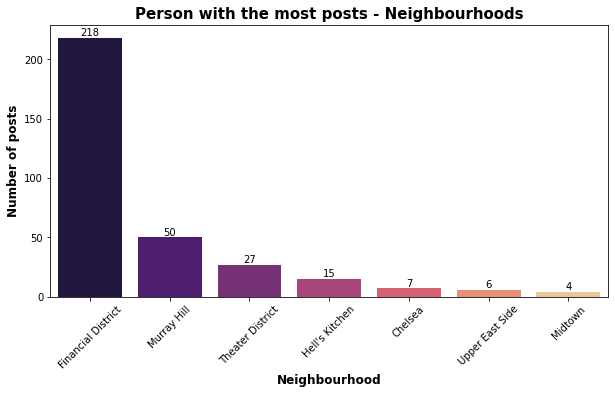

Average price per neighbourhood of the person with the most posts: 
                          price
neighbourhood                 
Theater District    286.777778
Financial District  264.853211
Chelsea             251.571429
Murray Hill         220.100000
Midtown             200.250000
Hell's Kitchen      185.933333
Upper East Side     159.666667


In [810]:
jup = data[data["host_id"] == 219517861].groupby("neighbourhood").agg({"name":"count"}).sort_values(by="name", ascending=False).head(10).reset_index()
plt.figure(figsize=(10,5))
haz = sns.countplot(data=data[data["host_id"] == 219517861], x="neighbourhood", palette="magma", order=jup["neighbourhood"])
haz.bar_label(haz.containers[0])
plt.title("Person with the most posts - Neighbourhoods", fontsize=15, fontweight="bold")
plt.xlabel("Neighbourhood", fontsize=12, fontweight="bold")
plt.ylabel("Number of posts", fontsize=12, fontweight="bold")
plt.xticks(rotation=45)
plt.show()
del jup
print("Average price per neighbourhood of the person with the most posts:", "\n", data[data["host_id"] == 219517861].groupby("neighbourhood").agg({"price":"mean"}).sort_values(by="price", ascending=False))

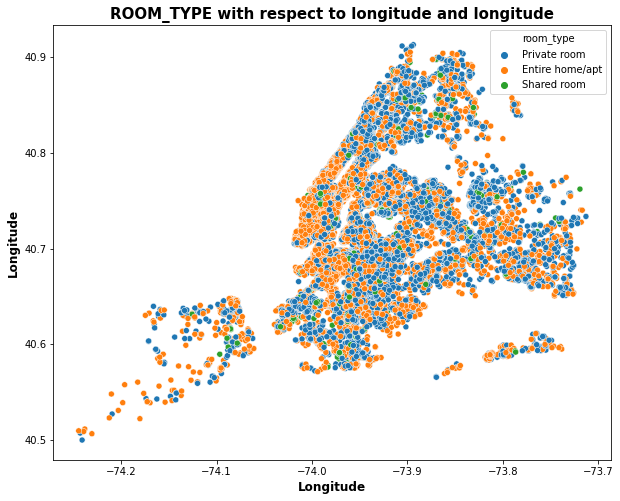

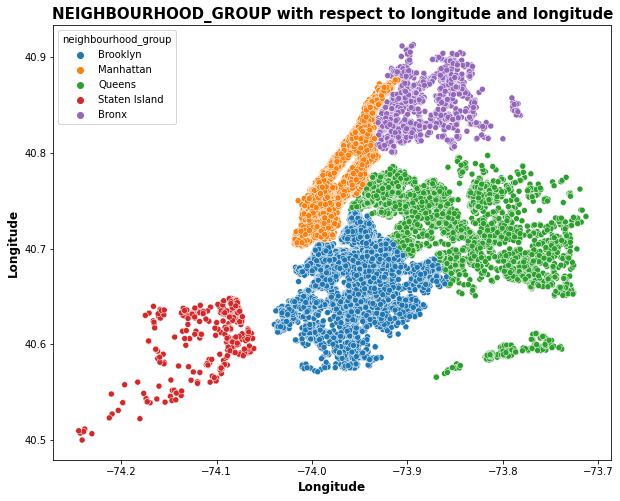

In [811]:
for i in ["room_type","neighbourhood_group"]:
    plt.figure(figsize=(10,8))
    sns.scatterplot(data=data,x="longitude",y="latitude", hue=i)
    plt.title("{} with respect to longitude and longitude".format(i.upper()), fontsize=15, fontweight="bold")
    plt.xlabel("Longitude", fontsize=12, fontweight="bold")
    plt.ylabel("Longitude", fontsize=12, fontweight="bold")
    plt.show()

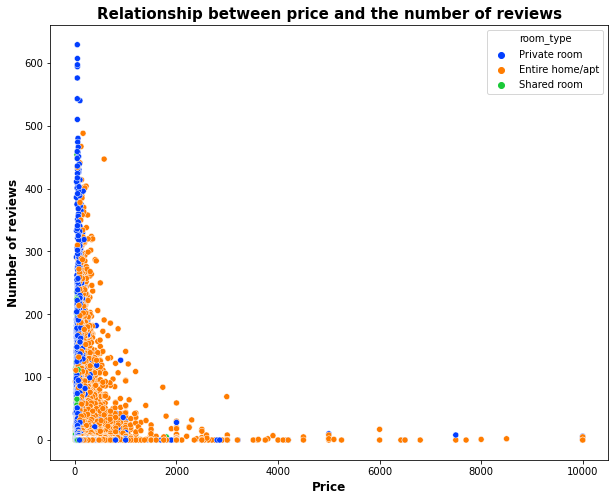

In [812]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=data,x="price",y="number_of_reviews", hue="room_type", palette="bright")
plt.title("Relationship between price and the number of reviews", fontsize=15, fontweight="bold")
plt.xlabel("Price", fontsize=12, fontweight="bold")
plt.ylabel("Number of reviews", fontsize=12, fontweight="bold")
plt.show()

In [813]:
print(data["price"].quantile(0.99))
q1 = data["price"].quantile(0.25)
q3 = data["price"].quantile(0.75)
iqr = q3 - q1
low_limit = q1 - (3*iqr)
up_limit = q3 + (3*iqr)
print("Upper outlier {}".format(i))
print(len(data[data["price"] > up_limit]))
print("Lower outlier {}".format(i))
print(len(data[data["price"] < low_limit]))
data = data[(data["price"] > low_limit) & (data["price"] < up_limit)]

799.0
Upper outlier neighbourhood_group
1328
Lower outlier neighbourhood_group
0


In [814]:
data["price"].quantile(0.99)

400.0

# ML Models

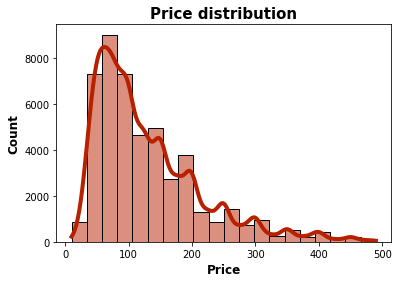

Average price 129.3647068718984


In [815]:
sns.histplot(x="price",data=data, kde=True, color="#B82100", line_kws={"lw":4}, bins=20)
plt.title("Price distribution", fontsize=15, fontweight="bold")
plt.xlabel("Price", fontsize=12, fontweight="bold")
plt.ylabel("Count", fontsize=12, fontweight="bold")
plt.show()
print("Average price {}".format(data["price"].mean()))

In [816]:
def logtransform(yes):
    if yes == "yes":
        data["price"] = np.log2(data["price"])
        print("You've selected log transformization")

In [817]:
# For log trans - price "yes"
logtransform("yes")

You've selected log transformization


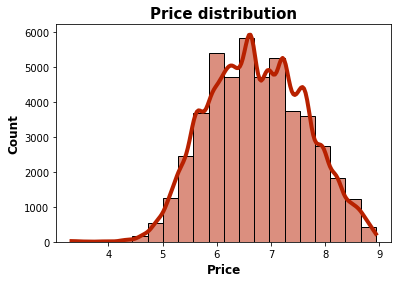

Average price 6.741042343182372


In [818]:
sns.histplot(x="price",data=data, kde=True, color="#B82100", line_kws={"lw":4}, bins=20)
plt.title("Price distribution", fontsize=15, fontweight="bold")
plt.xlabel("Price", fontsize=12, fontweight="bold")
plt.ylabel("Count", fontsize=12, fontweight="bold")
plt.show()
print("Average price {}".format(data["price"].mean()))

In [819]:
for i in data.select_dtypes(include="object").columns:
    data[i] = data[i].astype("category")
    data[i] = data[i].cat.codes
for i in ["neighbourhood_group","room_type"]:
    print(i)
    print(data[i].value_counts())
data.head()

neighbourhood_group
2    20680
1    19800
3     5628
0     1081
4      367
Name: neighbourhood_group, dtype: int64
room_type
0    24268
1    22141
2     1147
Name: room_type, dtype: int64


,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,11912,2787,4903,1,107,40.64749,-73.97237,1,7.219169,1,9,1495,0.21,6,365
1,36427,2845,4700,2,126,40.75362,-73.98377,0,7.813781,1,45,1709,0.38,2,355
2,42385,4632,2860,2,93,40.80902,-73.94190,1,7.228819,3,0,1758,0.02,1,365
3,14349,4869,6099,1,41,40.68514,-73.95976,0,6.475733,1,270,1754,4.64,1,194
4,18195,7192,5823,2,61,40.79851,-73.94399,0,6.321928,10,9,1526,0.10,1,0


In [820]:
# Splitting the data into X and Y and then testing/training.
from sklearn.model_selection import train_test_split
X = data.drop(columns="price")
y = data["price"]
xTrain, xTest, yTrain, yTest = train_test_split(X,y)

In [821]:
print("Average price - Training dataset = {}".format(yTrain.mean()))
print("Average price - Testing dataset = {}".format(yTest.mean()))

Average price - Training dataset = 6.74071697751166
Average price - Testing dataset = 6.742018440194506


In [822]:
# Importing metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, explained_variance_score
from sklearn.model_selection import cross_val_score
from math import sqrt

In [823]:
# We will use:
# 1 Linear Regression
# 2 Decision Tree Regression
# 3 Random Forest Regression
# 4 Gradient Boosting Regression
# 5 SVR
# 6 Lasso Regression
# 7 Ridge Regression

# Creating a table for results.
results = pd.DataFrame(columns=["Model","R2Train","R2Test","MAEtrain","MAEtest","MSEtrain","MSEtest", "RMSEtrain","RMSEtest"])

# Defining function for model
def regressionmodel(test):
    test.fit(xTrain,yTrain)
    r2train = r2_score(yTrain, test.predict(xTrain))
    r2test = r2_score(yTest, test.predict(xTest))
    maetrain = mean_absolute_error(yTrain, test.predict(xTrain))
    maetest = mean_absolute_error(yTest, test.predict(xTest))
    msetrain = mean_squared_error(yTrain, test.predict(xTrain))
    msetest = mean_squared_error(yTest, test.predict(xTest))
    rmsetrain = sqrt(mean_squared_error(yTrain, test.predict(xTrain)))
    rmsetest = sqrt(mean_squared_error(yTest, test.predict(xTest)))
    print("R2 Score - Training dataset = {}".format(r2train))
    print("R2 Score - Testing dataset = {}".format(r2test),"\n")
    print("MAE - Training dataset = {}".format(maetrain))
    print("MAE - Testing dataset = {}".format(maetest),"\n")
    print("MSE - Training dataset = {}".format(msetrain))
    print("MSE - Testing dataset = {}".format(msetest),"\n")
    print("RMSE - Training dataset = {}".format(rmsetrain))
    print("RMSE - Testing dataset = {}".format(rmsetest))
    if test == LR:
        results.loc[len(results.index)] = ["LR",r2train,r2test,maetrain,maetest,msetrain,msetest,rmsetrain,rmsetest]
    elif test == DTR:
        results.loc[len(results.index)] = ["DTR",r2train,r2test,maetrain,maetest,msetrain,msetest,rmsetrain,rmsetest]
    elif test == RFR:
        results.loc[len(results.index)] = ["RFR",r2train,r2test,maetrain,maetest,msetrain,msetest,rmsetrain,rmsetest]
    elif test == GBR:
        results.loc[len(results.index)] = ["GBR",r2train,r2test,maetrain,maetest,msetrain,msetest,rmsetrain,rmsetest]
    elif test == LAR:
        results.loc[len(results.index)] = ["LAR",r2train,r2test,maetrain,maetest,msetrain,msetest,rmsetrain,rmsetest]
    elif test == RR:
        results.loc[len(results.index)] = ["RR",r2train,r2test,maetrain,maetest,msetrain,msetest,rmsetrain,rmsetest]
    else:
        results.loc[len(results.index)] = ["Unknown",r2train,r2test,maetrain,maetest,msetrain,msetest,rmsetrain,rmsetest]

def transformization(tran):
    global xTrain, yTrain
    if tran == "stand":
        print("You have selected Standardization.","\n")
        from sklearn.preprocessing import StandardScaler
        xTrain, xTest, yTrain, yTest = train_test_split(X,y)
        scal = StandardScaler()
        xTrain = scal.fit_transform(xTrain)
        xTest = scal.transform(xTest)
        xTrain = pd.DataFrame(xTrain, columns=X.columns)
        xTest = pd.DataFrame(xTest, columns=X.columns)

    elif tran == "norm":
        print("You have selected Normalization.","\n")
        from sklearn.preprocessing import MinMaxScaler
        xTrain, xTest, yTrain, yTest = train_test_split(X,y)
        norm = MinMaxScaler()
        xTrain = norm.fit_transform(xTrain)
        xTest = norm.transform(xTest)
        xTrain = pd.DataFrame(xTrain, columns=X.columns)
        xTest = pd.DataFrame(xTest, columns=X.columns)
        
    else:
        print("You didn't select any type of transformation of features, proceeding with the original dataset.","\n")
    
def crossval(m):
    print("Cross-validation on Training split:")
    for i in ["r2","neg_mean_absolute_error","neg_mean_squared_error"]:
        print(i.upper())
        print(cross_val_score(m, xTrain, yTrain, scoring=i).mean())
    print("\n")

In [824]:
# TRANSFORMATION OF FEATURES
# Standardization - "stand"
# Normalizazion - "norm"
# None - "none"
transformization("none")

You didn't select any type of transformation of features, proceeding with the original dataset. 



In [825]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
crossval(LR)
regressionmodel(LR)

Cross-validation on Training split:
R2
0.5068745878418423
NEG_MEAN_ABSOLUTE_ERROR
-0.4833879420718506
NEG_MEAN_SQUARED_ERROR
-0.39457023969028937


R2 Score - Training dataset = 0.50732295415249
R2 Score - Testing dataset = 0.5158962094221643 

MAE - Training dataset = 0.4831940607178447
MAE - Testing dataset = 0.4779035555421861 

MSE - Training dataset = 0.39418033127547764
MSE - Testing dataset = 0.38368746713414126 

RMSE - Training dataset = 0.6278378224314601
RMSE - Testing dataset = 0.6194251101901999


In [826]:
# 1 Linear Regression
# 2 Decision Tree Regression
# 3 Random Forest Regression
# 4 Gradient Boosting Regression
# 5 Lasso Regression
# 6 Ridge Regression

In [827]:
from sklearn.tree import DecisionTreeRegressor
DTR = DecisionTreeRegressor()
crossval(DTR)
regressionmodel(DTR)

Cross-validation on Training split:
R2
0.2834693629080803
NEG_MEAN_ABSOLUTE_ERROR
-0.5686559578780367
NEG_MEAN_SQUARED_ERROR
-0.5755346295372208


R2 Score - Training dataset = 1.0
R2 Score - Testing dataset = 0.2754476700818641 

MAE - Training dataset = 1.1454904339082559e-17
MAE - Testing dataset = 0.5650479588501766 

MSE - Training dataset = 2.344443209505348e-32
MSE - Testing dataset = 0.5742604244858361 

RMSE - Training dataset = 1.5311574737777132e-16
RMSE - Testing dataset = 0.757799725841753


In [828]:
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor()
regressionmodel(RFR)

R2 Score - Training dataset = 0.9511359526280676
R2 Score - Testing dataset = 0.6539980678006849 

MAE - Training dataset = 0.14838583656935087
MAE - Testing dataset = 0.3956151249070359 

MSE - Training dataset = 0.039095075654266516
MSE - Testing dataset = 0.27423169901357974 

RMSE - Training dataset = 0.19772474719737668
RMSE - Testing dataset = 0.5236713654703489


In [829]:
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor()
crossval(GBR)
regressionmodel(GBR)

Cross-validation on Training split:
R2
0.6317812371764334
NEG_MEAN_ABSOLUTE_ERROR
-0.41587975582079445
NEG_MEAN_SQUARED_ERROR
-0.29464697468965584


R2 Score - Training dataset = 0.6426099452630418
R2 Score - Testing dataset = 0.6353969686885967 

MAE - Training dataset = 0.409753050554142
MAE - Testing dataset = 0.4123194360822054 

MSE - Training dataset = 0.2859401130175207
MSE - Testing dataset = 0.28897442308047744 

RMSE - Training dataset = 0.5347336841994533
RMSE - Testing dataset = 0.5375634130783804


In [830]:
from sklearn.linear_model import Lasso
LAR = Lasso()
regressionmodel(LAR)

R2 Score - Training dataset = 0.05014327853097322
R2 Score - Testing dataset = 0.043575662674431026 

MAE - Training dataset = 0.7151042085290958
MAE - Testing dataset = 0.7130108804941124 

MSE - Training dataset = 0.7599599784252711
MSE - Testing dataset = 0.7580358564345817 

RMSE - Training dataset = 0.8717568344585955
RMSE - Testing dataset = 0.870652546332107


In [831]:
from sklearn.linear_model import Ridge
RR = Ridge()
crossval(RR)
regressionmodel(RR)

Cross-validation on Training split:
R2
0.5068593726964106
NEG_MEAN_ABSOLUTE_ERROR
-0.4835519320991447
NEG_MEAN_SQUARED_ERROR
-0.3945824086765338


R2 Score - Training dataset = 0.5073113608878999
R2 Score - Testing dataset = 0.5158682685554551 

MAE - Training dataset = 0.48332330578909966
MAE - Testing dataset = 0.47802862154346637 

MSE - Training dataset = 0.39418960679767867
MSE - Testing dataset = 0.38370961230339184 

RMSE - Training dataset = 0.6278452092655312
RMSE - Testing dataset = 0.6194429855147218


In [832]:
results

,Model,R2Train,R2Test,MAEtrain,MAEtest,MSEtrain,MSEtest,RMSEtrain,RMSEtest
0,LR,0.507323,0.515896,4.831941e-01,0.477904,3.941803e-01,0.383687,6.278378e-01,0.619425
1,DTR,1.000000,0.275448,1.145490e-17,0.565048,2.344443e-32,0.574260,1.531157e-16,0.757800
2,RFR,0.951136,0.653998,1.483858e-01,0.395615,3.909508e-02,0.274232,1.977247e-01,0.523671
3,GBR,0.642610,0.635397,4.097531e-01,0.412319,2.859401e-01,0.288974,5.347337e-01,0.537563
4,LAR,0.050143,0.043576,7.151042e-01,0.713011,7.599600e-01,0.758036,8.717568e-01,0.870653
5,RR,0.507311,0.515868,4.833233e-01,0.478029,3.941896e-01,0.383710,6.278452e-01,0.619443


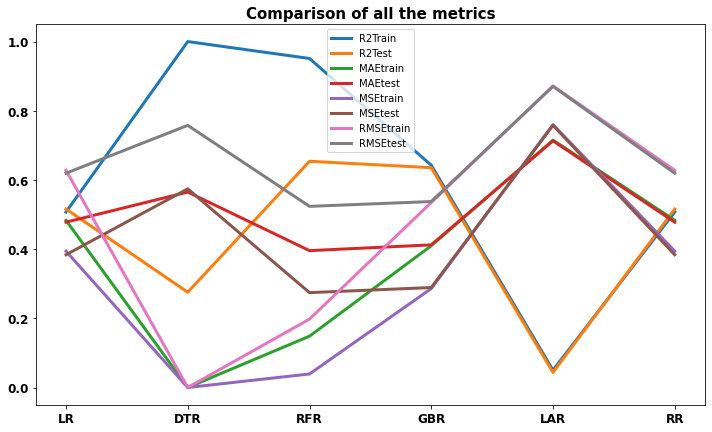

In [833]:
plt.figure(figsize=(12,7))
for i in results.select_dtypes(include="number").columns:
    plt.plot(results["Model"],results[i], label=i, linewidth=3)
    plt.title("Comparison of all the metrics", fontsize=15, fontweight="bold")
    plt.xticks(fontsize=12, fontweight="bold")
    plt.yticks(fontsize=12, fontweight="bold")
    plt.legend()

In [834]:
# # Parameter tuning - one parameter - max_depth.
# from sklearn.model_selection import GridSearchCV
# RFR2 = RandomForestRegressor()
# param_grid = {'max_depth':list(range(1,20))}
# GRDSCV = GridSearchCV(estimator=RFR2, param_grid=param_grid)
# RFR2 = GRDSCV.fit(xTrain,yTrain)

In [835]:
# # We got worse results than with the default settings of parameters.
# print(RFR2.best_params_)
# RFRCV = RFR2.best_estimator_
# regressionmodel(RFRCV)

# Merging datasets together

In [836]:
predictedTrain = pd.DataFrame({"Actual":yTrain,"Predicted":RFR.predict(xTrain),"Type":"Seen"})
predictedTest = pd.DataFrame({"Actual":yTest,"Predicted":RFR.predict(xTest),"Type":"Unseen"})
predictedData = pd.concat([predictedTrain,predictedTest])
predictedData.shape

(47556, 3)

In [837]:
merged = pd.merge(left=data,right=predictedData,left_index=True,right_index=True,how="inner")

In [838]:
merged

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Actual,Predicted,Type
0,11912,2787,4903,1,107,40.64749,-73.97237,1,7.219169,1,9,1495,0.21,6,365,7.219169,6.917094,Seen
1,36427,2845,4700,2,126,40.75362,-73.98377,0,7.813781,1,45,1709,0.38,2,355,7.813781,7.508828,Unseen
2,42385,4632,2860,2,93,40.80902,-73.94190,1,7.228819,3,0,1758,0.02,1,365,7.228819,7.472783,Unseen
3,14349,4869,6099,1,41,40.68514,-73.95976,0,6.475733,1,270,1754,4.64,1,194,6.475733,6.988892,Unseen
4,18195,7192,5823,2,61,40.79851,-73.94399,0,6.321928,10,9,1526,0.10,1,0,6.321928,7.069891,Unseen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,11247,8232441,8898,1,13,40.67853,-73.94995,1,6.129283,2,0,1758,0.02,2,9,6.129283,5.944858,Unseen
48891,3301,6570630,6664,1,28,40.70184,-73.93317,1,5.321928,4,0,1758,0.02,2,36,5.321928,5.576421,Seen
48892,41332,23492952,4196,2,93,40.81475,-73.94867,0,6.845490,10,0,1758,0.02,1,27,6.845490,6.872417,Seen
48893,2400,30985759,10011,2,94,40.75751,-73.99112,2,5.781360,1,0,1758,0.02,6,2,5.781360,6.070527,Seen


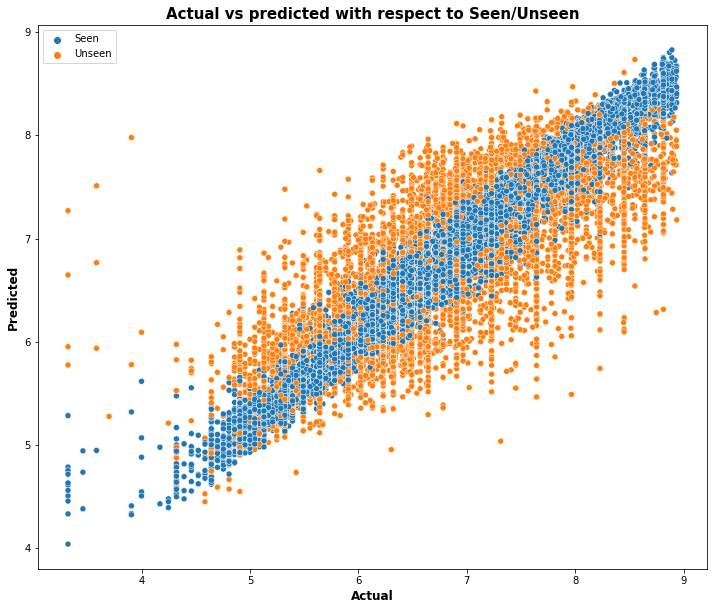

In [839]:
plt.figure(figsize=(12,10))
sns.scatterplot(x="Actual",y="Predicted",data=merged,hue="Type")
plt.title("Actual vs predicted with respect to Seen/Unseen", fontsize=15, fontweight="bold")
plt.xlabel("Actual",fontsize=12, fontweight="bold")
plt.ylabel("Predicted",fontsize=12, fontweight="bold")
plt.legend()
plt.show()